In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

In [20]:
try:
    df_training = pd.read_csv('training_results.csv', sep=';')
    df_testing = pd.read_csv('testing_results.csv', sep=';')
    print("Dati di training e testing caricati con successo!")
except FileNotFoundError:
    print("Errore.")
    raise

Dati di training e testing caricati con successo!


In [21]:
# Converti le colonne numeriche al tipo corretto se necessario
df_training['Training Loss'] = pd.to_numeric(df_training['Training Loss'], errors='coerce')
df_training['Validation Loss'] = pd.to_numeric(df_training['Validation Loss'], errors='coerce')
df_testing['F1-Score'] = pd.to_numeric(df_testing['F1-Score'], errors='coerce')

# Visualizza le prime righe di ogni DataFrame per verifica
print("\nDataFrame di Training:")
print(df_training.head())
print("\nDataFrame di Testing:")
print(df_testing.head())


DataFrame di Training:
               Model                Dataset  Token Length  Epoch  \
0  bert-base-uncased  disi-unibo-nlp/JNLPBA             1      1   
1  bert-base-uncased  disi-unibo-nlp/JNLPBA             1      2   
2  bert-base-uncased  disi-unibo-nlp/JNLPBA             1      3   
3  bert-base-uncased  disi-unibo-nlp/JNLPBA             1      4   
4  bert-base-uncased  disi-unibo-nlp/JNLPBA             1      5   

   Training Loss  Validation Loss  
0         0.6433           0.4578  
1         0.4512           0.3980  
2         0.4080           0.3599  
3         0.3836           0.3386  
4         0.3684           0.3250  

DataFrame di Testing:
                    Model                Dataset  Token_Length   Category  \
0  medicalai/ClinicalBERT  disi-unibo-nlp/JNLPBA             1  CELL_LINE   
1  medicalai/ClinicalBERT  disi-unibo-nlp/JNLPBA             1  CELL_TYPE   
2  medicalai/ClinicalBERT  disi-unibo-nlp/JNLPBA             1        DNA   
3  medicalai/Clinica

C:\Users\Franco\AppData\Local\Temp\ipykernel_20844\1489461189.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Paired', num_configs)


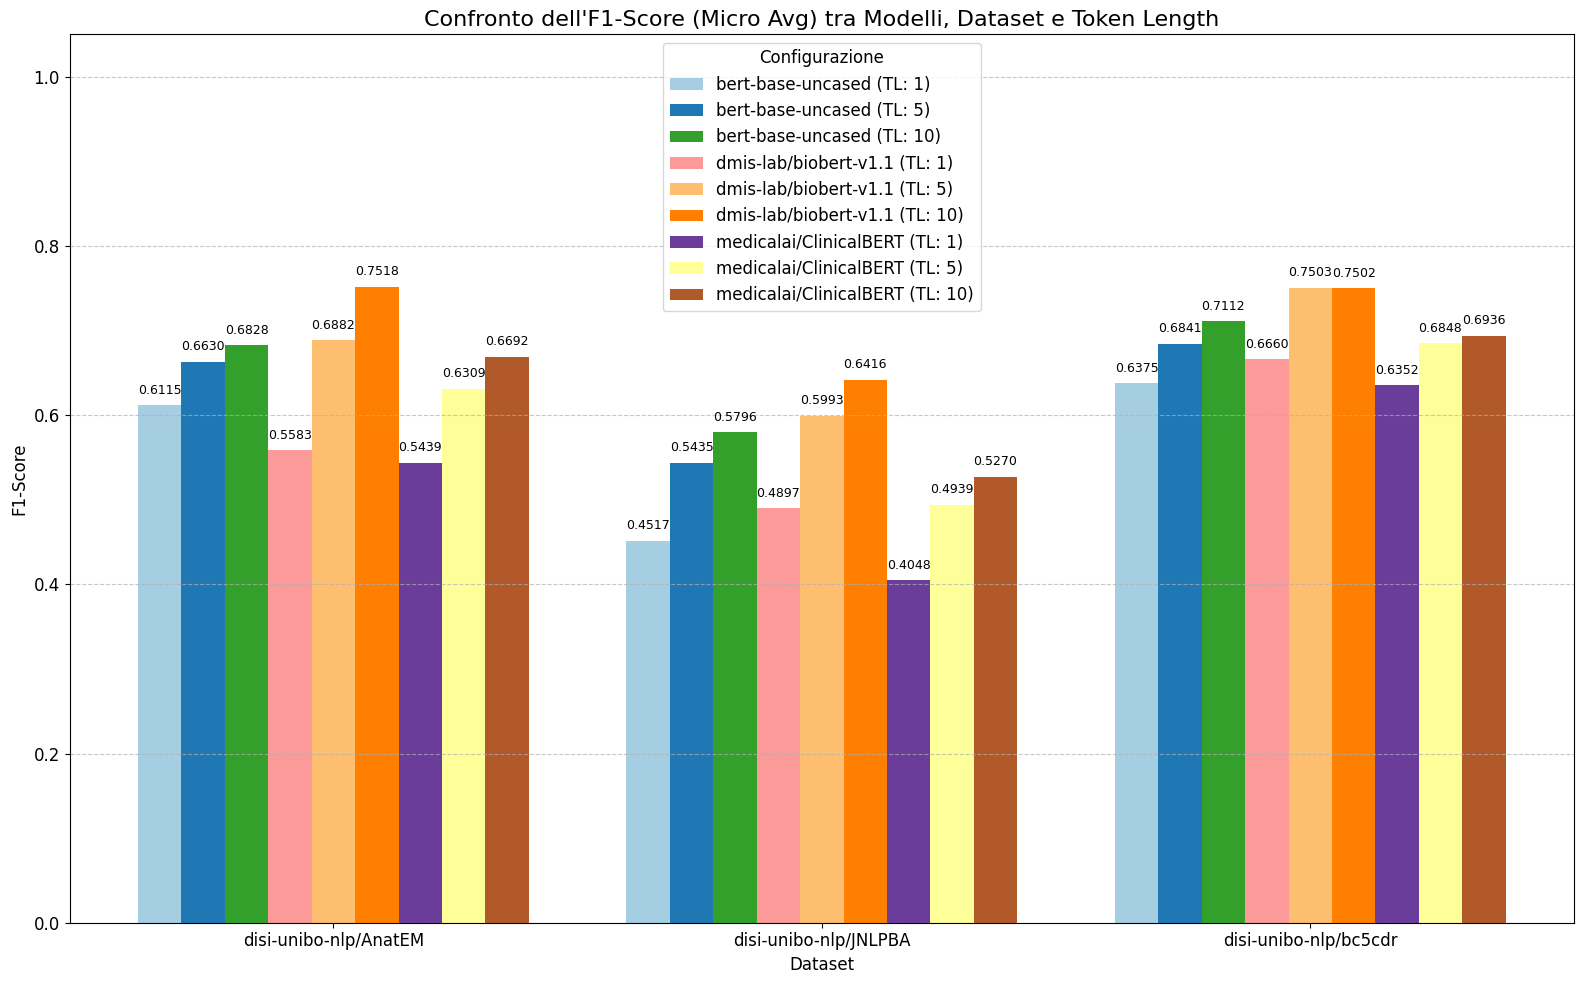

In [22]:
df_testing_avg = df_testing[df_testing['Category'].isin(['micro avg'])].copy()

# Sort
df_testing_avg = df_testing_avg.sort_values(by=['Dataset', 'Model', 'Token_Length'])

plt.figure(figsize=(16, 10))

# Dati
datasets = df_testing_avg['Dataset'].unique()
configurations = df_testing_avg[['Model', 'Token_Length']].drop_duplicates().reset_index(drop=True)
num_configs = len(configurations)
bar_width = 0.8 / num_configs
x_pos = np.arange(len(datasets))

colors = plt.cm.get_cmap('Paired', num_configs)

# Barre
for i, (index, config) in enumerate(configurations.iterrows()):
    model = config['Model']
    token_len = config['Token_Length']

    subset = df_testing_avg[(df_testing_avg['Model'] == model) & (df_testing_avg['Token_Length'] == token_len)]
    heights = [subset[subset['Dataset'] == ds]['F1-Score'].iloc[0] for ds in datasets]
    position = x_pos + (i - (num_configs - 1) / 2) * bar_width
    
    plt.bar(position, heights, bar_width, label=f'{model} (TL: {token_len})', color=colors(i))
    
    # Etichette sopra le barre
    for pos, height in zip(position, heights):
        plt.text(pos, height + 0.01, f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Info grafico
plt.title('Confronto dell\'F1-Score (Micro Avg) tra Modelli, Dataset e Token Length', fontsize=16)
plt.xlabel('Dataset', fontsize=12)
plt.ylabel('F1-Score', fontsize=12)
plt.xticks(x_pos, datasets)
plt.ylim(0, 1.05)
plt.legend(title='Configurazione')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()